In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("data/machine-ready-credit.csv")

In [3]:
df.head()

,Checking.Account,Duration,Credit.History,Purpose,Credit.Amount,Savings.Account.Bonds,Present.employee,Installment.rate,Other.Debters,Present.Residence.Since,...,Other.Installment.plans,Housing,Number.of.existing.credits.at.this.bank,Job,Liable.to.Provide.Maintainance,Telephone,Foreign.Worker,Outcome,Sex,Personal.Status
0,0,6,0,0,1169,0,0,4,0,4,...,0,0,2,0,1,0,0,0,0,0
1,1,48,1,0,5951,1,1,2,0,2,...,0,0,1,0,1,1,0,1,1,1
2,2,12,0,1,2096,1,2,2,0,3,...,0,0,1,1,2,1,0,0,0,0
3,0,42,1,2,7882,1,2,2,1,4,...,0,1,1,0,2,1,0,0,0,0
4,0,24,2,3,4870,1,1,3,0,4,...,0,1,2,0,2,1,0,1,0,0


In [4]:
df.shape

(1000, 22)

In [5]:
 from sklearn.preprocessing import StandardScaler

In [6]:
X = df.drop(columns="Outcome", axis = 1)
y = df["Outcome"]

In [7]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [9]:
import seaborn as sns

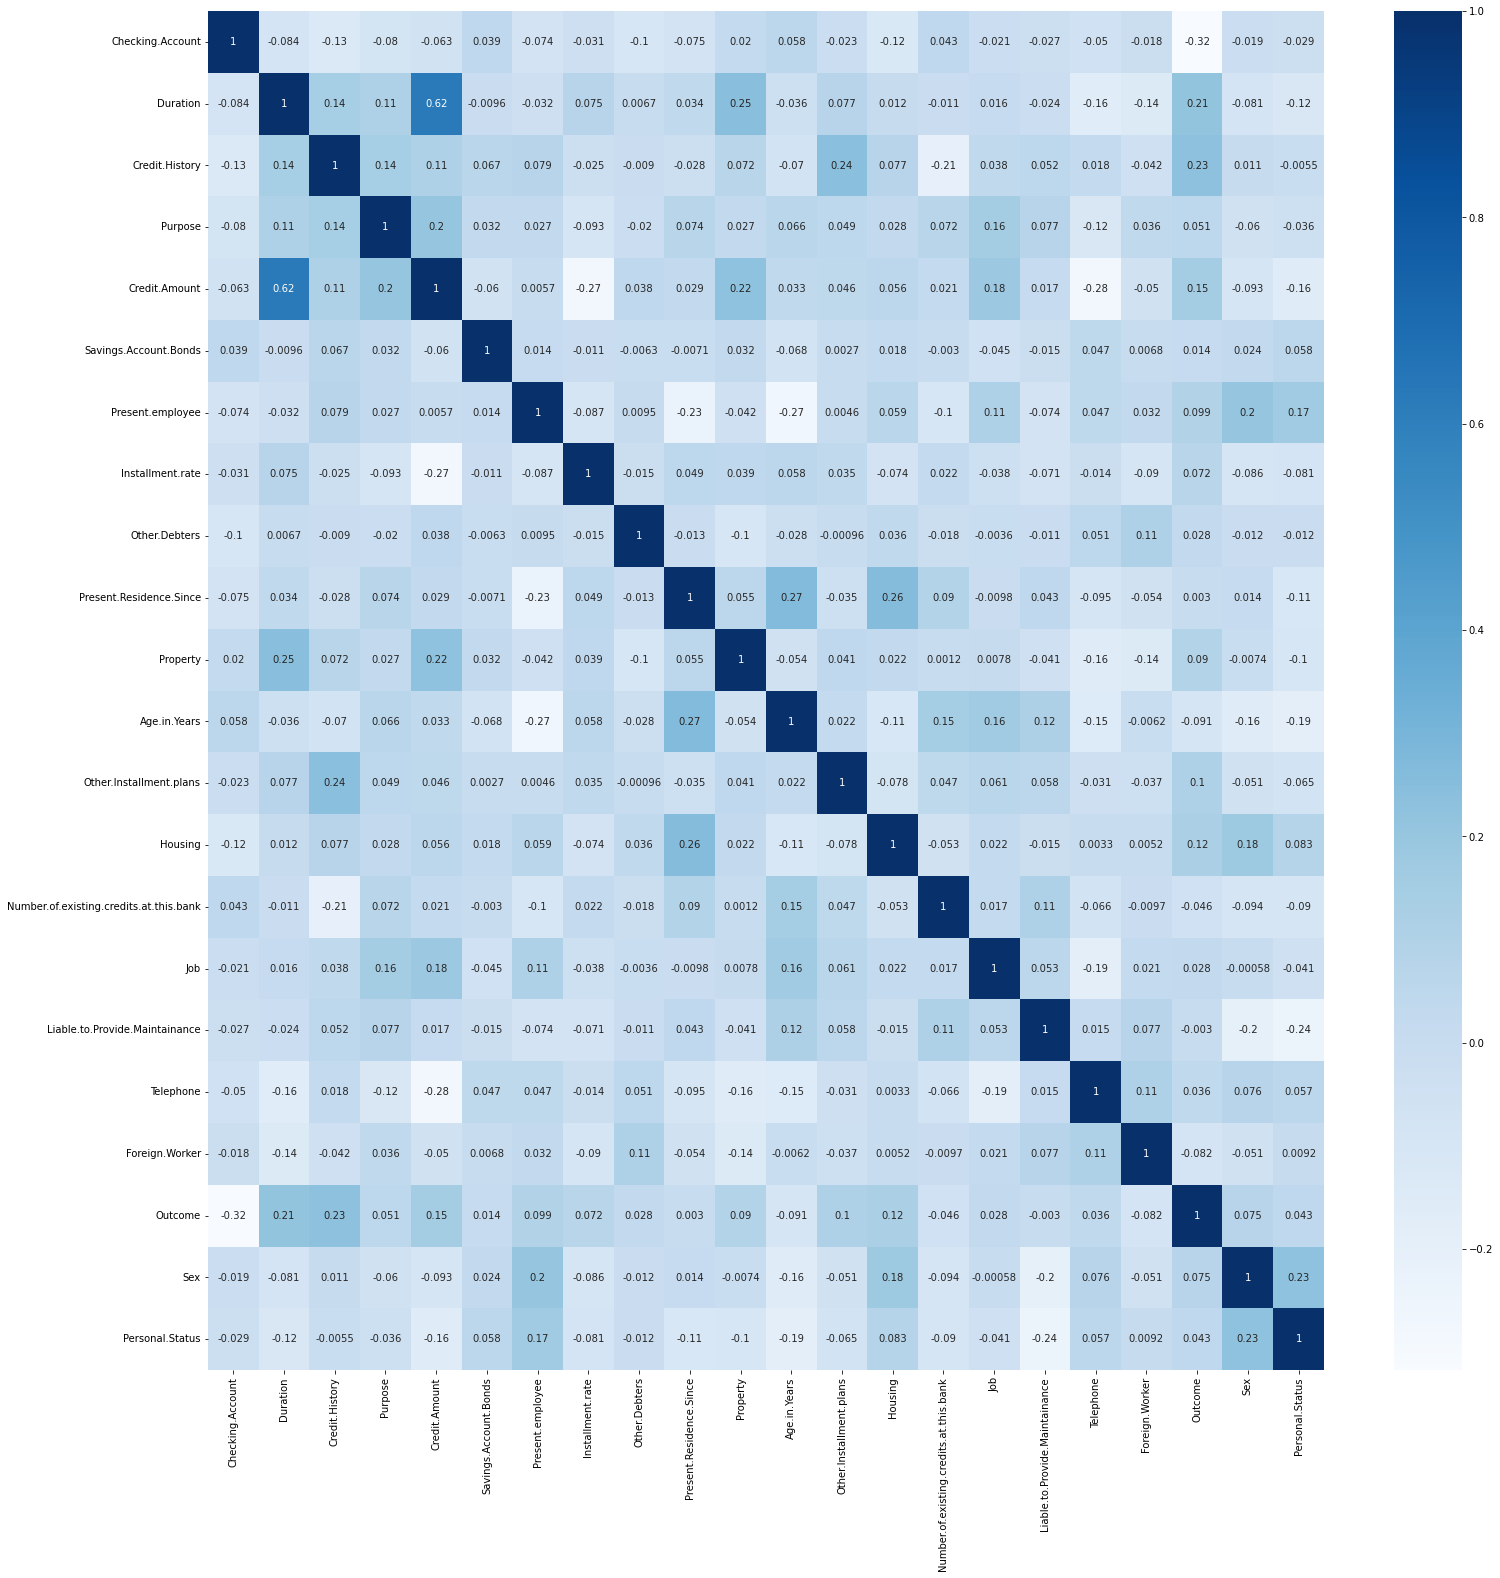

In [10]:
plt.figure(figsize=(25,25))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

In [11]:
# Spplitting the datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state = 42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 21), (250, 21), (750,), (250,))

In [13]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics

## Decision trees Classifier
The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
decision_trees_model = DecisionTreeClassifier()
decision_trees_classifier = decision_trees_model.fit(X_train, y_train)

In [16]:
y_pred_decisiontrees = decision_trees_model.predict(X_test)
print("Decision Trees Clasifier Train Accuracy : {} %".format(decision_trees_classifier.score(X_train,
                                                                                           y_train)*100))
print("\nDecision Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                      y_pred_decisiontrees)*100))

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_decisiontrees)
error_rate_decision_trees = 1 - accuracy

print("\nERROR RATE FOR RANDOM FOREST: {}%".format(error_rate_decision_trees))


print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_decisiontrees)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_decisiontrees)))

Decision Trees Clasifier Train Accuracy : 100.0 %

Decision Trees Clasifier Test Accuracy : 64.0 %

ERROR RATE FOR RANDOM FOREST: 0.36%
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       178
           1       0.39      0.46      0.42        72

    accuracy                           0.64       250
   macro avg       0.58      0.59      0.58       250
weighted avg       0.66      0.64      0.65       250

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[127  51]
 [ 39  33]]


## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

In [17]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=50000)
logistic_classifier = logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_logistic)
error_rate_logistic = 1 - accuracy

print("\nERROR RATE FOR LOGISTIC REGRESSION: {}%".format(error_rate_logistic))


print("Logistic regression Train Accuracy : {} %".format(logistic_classifier.score(X_train, 
                                                                                   y_train)*100))
print("\nLogistic regression Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_pred_logistic)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_logistic)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_logistic)))


ERROR RATE FOR LOGISTIC REGRESSION: 0.23199999999999998%
Logistic regression Train Accuracy : 74.8 %

Logistic regression Test Accuracy : 76.8 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       178
           1       0.65      0.42      0.51        72

    accuracy                           0.77       250
   macro avg       0.72      0.66      0.68       250
weighted avg       0.75      0.77      0.75       250

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[162  16]
 [ 42  30]]


## K-Nearest Neighbours
This algorithm is used to solve the classification model problems. K-nearest neighbor or K-NN algorithm basically creates an imaginary boundary to classify the data. When new data points come in, the algorithm will try to predict that to the nearest of the boundary line.

Therefore, larger k value means smother curves of separation resulting in less complex models. Whereas, smaller k value tends to overfit the data and resulting in complex models.

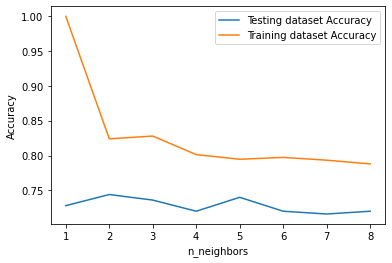

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Not very time resourceful
``` python
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
```

## Linear Discriminant Analysis
Linear discriminant analysis (LDA) is based on the Bayes decision theory and assumes that the conditional probability density functions are normally distributed. LDA also makes the simplifying homoscedastic assumption (i.e. that the class covariances are identical) and that the covariances have full rank. With these assumptions, the discriminant function of an input being in a class is purely a function of this linear combination of independent variables.

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf_classifier = clf.fit(X_train, y_train)

y_pred_clf = clf.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_clf)
error_rate_clf = 1 - accuracy

print("Linear Discriminant Analysis  Train Accuracy : {} %".format(logistic_classifier.score(X_train, 
                                                                                   y_train)*100))
print("\nLinear Discriminant Analysis  Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_pred_clf)*100))

print("\nERROR RATE FOR LDA: {}%".format(error_rate_clf))

print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_clf)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_clf)))

Linear Discriminant Analysis  Train Accuracy : 74.8 %

Linear Discriminant Analysis  Test Accuracy : 76.0 %

ERROR RATE FOR LDA: 0.24%
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       178
           1       0.62      0.43      0.51        72

    accuracy                           0.76       250
   macro avg       0.71      0.66      0.67       250
weighted avg       0.74      0.76      0.75       250

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[159  19]
 [ 41  31]]


## Quadratic Discriminant Analysis
Quadratic discriminant analysis (QDA) is closely related to LDA. Like LDA, QDA models the conditional probability density functions as a Gaussian distribution, then uses the posterior distributions to estimate the class for a given test data.

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_clf = QuadraticDiscriminantAnalysis()
qda_clf_classifier = qda_clf.fit(X_train, y_train)

y_pred_qda_clf = qda_clf.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_qda_clf)
error_rate_qda_clf = 1 - accuracy

print("Quadratic Discriminant Analysis  Train Accuracy : {} %".format(logistic_classifier.score(X_train, 
                                                                                   y_train)*100))
print("\Quadratic Discriminant Analysis  Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_pred_qda_clf)*100))

print("\nERROR RATE FOR QDA: {}%".format(error_rate_qda_clf))

print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_qda_clf)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_qda_clf)))

Quadratic Discriminant Analysis  Train Accuracy : 74.8 %
\Quadratic Discriminant Analysis  Test Accuracy : 75.2 %

ERROR RATE FOR QDA: 0.248%
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       178
           1       0.57      0.58      0.58        72

    accuracy                           0.75       250
   macro avg       0.70      0.70      0.70       250
weighted avg       0.75      0.75      0.75       250

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[146  32]
 [ 30  42]]


## Support Vector Machines
The basic support vector machine (SVM) is a binary linear classifier which chooses the hyperplane that represents the largest separation, or margin, between the two classes. If such a hyperplane exists, it is known as the maximum-margin hyperplane and the linear classifier it defines is known as a maximum margin classifier.

If there exists no hyperplane that can perfectly split the positive and negative instances, the soft margin method will choose a hyperplane that splits the instances as cleanly as possible, while still maximizing the distance to the nearest cleanly split instances.

#### C-Support Vector Classification.

In [20]:
from sklearn.svm import SVC

svc = SVC()
SVC_clf = svc.fit(X_train, y_train)

y_pred_svc = SVC_clf.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_svc)
error_rate_svc = 1 - accuracy

print("SVC  Train Accuracy : {} %".format(logistic_classifier.score(X_train, 
                                                                                   y_train)*100))
print("\nSVC  Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_pred_svc)*100))

print("\nERROR RATE FOR SVC: {}%".format(error_rate_svc))

print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_svc)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_svc)))

SVC  Train Accuracy : 74.8 %

SVC  Test Accuracy : 75.2 %

ERROR RATE FOR SVC: 0.248%
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.94      0.84       178
           1       0.66      0.29      0.40        72

    accuracy                           0.75       250
   macro avg       0.71      0.61      0.62       250
weighted avg       0.73      0.75      0.72       250

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[167  11]
 [ 51  21]]


#### Nu-Support Vector Classification.
Similar to SVC but uses a parameter to control the number of support vectors.



```python
from sklearn.svm import NuSVC

nu_svc = NuSVC()
nu_svc_clf = nu_svc.fit(X_train, y_train)

y_pred_nu_svc = nu_svc_clf.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_nu_svc)
error_rate_nu_svc = 1 - accuracy

print("NU_SVC  Train Accuracy : {} %".format(logistic_classifier.score(X_train, 
                                                                                   y_train)*100))
print("\nNU_SVC  Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_pred_nu_svc)*100))

print("\nERROR RATE FOR NU_SVC: {}%".format(error_rate_nu_svc))

print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_nu_svc)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_nu_svc)))
```

In [21]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_classifier = random_forest_model.fit(X_train,y_train)

In [22]:
y_pred_randomforest = random_forest_model.predict(X_test)
print("Random Forest Clasifier Train Accuracy : {} %".format(random_forest_classifier.score(X_train,
                                                                                            y_train)*100))
print("\nRandom Forest Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                     y_pred_randomforest)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_randomforest)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_randomforest)))

Random Forest Clasifier Train Accuracy : 100.0 %

Random Forest Clasifier Test Accuracy : 76.4 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.92      0.85       178
           1       0.66      0.38      0.48        72

    accuracy                           0.76       250
   macro avg       0.72      0.65      0.66       250
weighted avg       0.75      0.76      0.74       250

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[164  14]
 [ 45  27]]


In [23]:

import xgboost
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xbgoost_classifier = xgboost_model.fit(X_train, y_train)

C:\Users\sasha\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:21:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
y_pred_xgboost = xgboost_model.predict(X_test)
print("XGBoost Clasifier Train Accuracy : {} %".format(xbgoost_classifier.score(X_train, y_train)*100))
print("\nXGBoost Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, y_pred_xgboost)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, y_pred_xgboost)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, y_pred_xgboost)))

XGBoost Clasifier Train Accuracy : 100.0 %

XGBoost Trees Clasifier Test Accuracy : 79.2 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       178
           1       0.69      0.51      0.59        72

    accuracy                           0.79       250
   macro avg       0.75      0.71      0.72       250
weighted avg       0.78      0.79      0.78       250

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[161  17]
 [ 35  37]]


In [26]:
(0.82 + 0.69)/2,  (0.9 + 0.51)/2,  (0.86 + 0.59)/2

(0.7549999999999999, 0.7050000000000001, 0.725)